In [1]:
import rpy2

In [2]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
readRDS = robjects.r['readRDS']

In [19]:
#Load dataset
df = readRDS('/rds/general/user/md2620/home/ML_project/df_finished.rds')
df = pandas2ri.rpy2py_dataframe(df)

In [20]:
#Check shape of dataset
df.shape

(10670, 121)

In [21]:
#Check first five rows of dataframe
df.head(5)

,SEQN,LBDSALSI,LBXSATSI,LBXSASSI,LBXSAPSI,LBDSBUSI,LBDSCASI,LBDSCHSI,LBXSC3SI,LBDSCRSI,...,SMQ020,SMD100BR,SMD410,SMQ680,WHD010,WHD020,WHD050,WHD140,casecont,penta_id
1,51624.0,48.0,24.0,23.0,41.0,2.14,2.350,3.439,26.0,83.10,...,Yes,,No,No,66.0,200.0,180.0,200.0,0,537.0
2,51628.0,39.0,15.0,21.0,97.0,3.57,2.375,5.043,25.0,98.12,...,Yes,NEWPORT,Yes,Yes,66.0,240.0,225.0,250.0,0,445.0
3,51630.0,43.0,18.0,21.0,74.0,4.64,2.500,6.749,25.0,69.84,...,Yes,MARLBORO ULTRA LIGHT,No,Yes,67.0,190.0,197.0,197.0,0,1059.0
4,51633.0,43.0,22.0,25.0,60.0,5.71,2.375,4.707,24.0,73.37,...,Yes,,No,No,72.0,175.0,240.0,250.0,0,1.0
5,51635.0,43.0,13.0,18.0,94.0,5.71,2.450,3.724,23.0,79.56,...,Yes,,No,No,73.0,190.0,180.0,215.0,0,53.0


In [6]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Create correlation matrix
corr_matrix = df.corr().abs()

In [33]:
#Get pairs of variables in correlation matrix with correlation coefficient > 0.45
high_corr_var=np.where(corr_matrix>0.01)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[('SEQN', 'LBDSALSI'), ('SEQN', 'LBXSATSI'), ('SEQN', 'LBXSASSI'), ('SEQN', 'LBXSAPSI'), ('SEQN', 'LBDSBUSI'), ('SEQN', 'LBDSCASI'), ('SEQN', 'LBXSC3SI'), ('SEQN', 'LBXSGTSI'), ('SEQN', 'LBDSGLSI'), ('SEQN', 'LBDSIRSI'), ('SEQN', 'LBXSLDSI'), ('SEQN', 'LBDSTBSI'), ('SEQN', 'LBDSTPSI'), ('SEQN', 'LBDSTRSI'), ('SEQN', 'LBXSKSI'), ('SEQN', 'LBXSCLSI'), ('SEQN', 'LBXSOSSI'), ('SEQN', 'LBDSGBSI'), ('SEQN', 'BMXWT'), ('SEQN', 'BMXHT'), ('SEQN', 'BMXBMI'), ('SEQN', 'BMXLEG'), ('SEQN', 'BMXARMC'), ('SEQN', 'BMXWAIST'), ('SEQN', 'BMXTRI'), ('SEQN', 'PEASCTM1'), ('SEQN', 'BPXPLS'), ('SEQN', 'BPXML1'), ('SEQN', 'DBQ197'), ('SEQN', 'HSQ480'), ('SEQN', 'HSQ493'), ('SEQN', 'HSQ496'), ('SEQN', 'PAD680'), ('SEQN', 'SLD010H'), ('SEQN', 'WHD010'), ('SEQN', 'WHD020'), ('SEQN', 'WHD050'), ('SEQN', 'WHD140'), ('SEQN', 'penta_id'), ('LBDSALSI', 'LBXSASSI'), ('LBDSALSI', 'LBXSAPSI'), ('LBDSALSI', 'LBDSBUSI'), ('LBDSALSI', 'LBDSCASI'), ('LBDSALSI', 'LBDSCHSI'), ('LBDSALSI', 'LBXSC3SI'), ('LBDSALSI', 'LBDSCRSI

In [36]:
#Correlation with output variable of ICD-10 codes that show correlation superior coefficients >0.02 in order to reduce size of correlation matrix.
cor_target = abs(corr_matrix[["penta_id"]])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.01]
relevant_features.dropna(inplace = True)

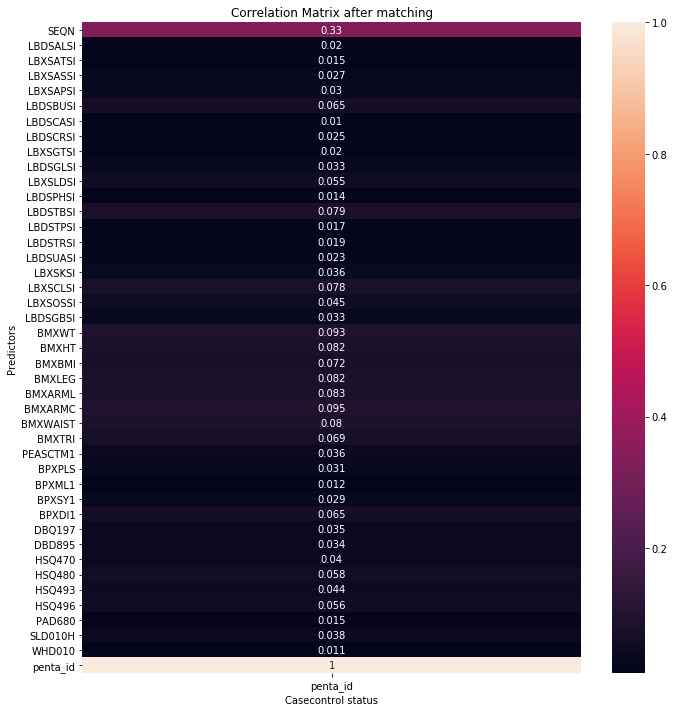

In [38]:
plt.figure(figsize=(10,10))

#Create a heatmap of the correlation matrix to analyze correlation between column C43 (for melanomas cases) and other ICD-10 codes that are most correlated to it.
#For visualization purposes, we only take va correlation >0.02
sns.heatmap(relevant_features, annot=True)
ax= plt.subplot()
# labels, title and ticks
ax.set_xlabel('Casecontrol status')
ax.set_ylabel('Predictors')
ax.set_title('Correlation Matrix after matching')
plt.tight_layout()
plt.show()
ax.figure.savefig('correlation_matrix.png')

CREATING MY DATASET FOR DESCRIPTIVE STATS

In [7]:
df_subset = df[['RIAGENDR', 'RIDAGEYR','RIDRETH1','SEQN','MCQ040' ]]
df_subset.head()

,RIAGENDR,RIDAGEYR,RIDRETH1,SEQN,MCQ040
1,1.0,34.0,3.0,51624.0,NaN
2,2.0,60.0,4.0,51628.0,NaN
3,1.0,26.0,1.0,51629.0,NaN
4,2.0,49.0,3.0,51630.0,NaN
5,1.0,80.0,3.0,51633.0,NaN


In [8]:
my_df = df_subset.dropna(axis = 0, how = 'any')

In [9]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4396 entries, 45 to 49660
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  4396 non-null   float64
 1   RIDAGEYR  4396 non-null   float64
 2   RIDRETH1  4396 non-null   float64
 3   SEQN      4396 non-null   float64
 4   MCQ040    4396 non-null   float64
dtypes: float64(5)
memory usage: 206.1+ KB


In [10]:
#Check you have no NAs remaining
print(my_df.isnull().sum().sum())

0


In [11]:
my_df['RIAGENDR'] = my_df['RIAGENDR'].replace({1: "Male", 2: "Female"})

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
my_df.RIAGENDR

45         Male
49       Female
53         Male
59       Female
78         Male
          ...  
49649      Male
49651      Male
49652      Male
49653    Female
49660      Male
Name: RIAGENDR, Length: 4396, dtype: object

In [13]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4396 entries, 45 to 49660
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  4396 non-null   object 
 1   RIDAGEYR  4396 non-null   float64
 2   RIDRETH1  4396 non-null   float64
 3   SEQN      4396 non-null   float64
 4   MCQ040    4396 non-null   float64
dtypes: float64(4), object(1)
memory usage: 366.1+ KB


In [14]:
my_df['MCQ040'] = my_df['MCQ040'].replace({1: "Yes", 2: "No", 7: "refused", 9:"Don't Know"})

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
my_df.MCQ040

45        No
49        No
53       Yes
59       Yes
78        No
        ... 
49649    Yes
49651     No
49652     No
49653    Yes
49660     No
Name: MCQ040, Length: 4396, dtype: object

In [16]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4396 entries, 45 to 49660
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  4396 non-null   object 
 1   RIDAGEYR  4396 non-null   float64
 2   RIDRETH1  4396 non-null   float64
 3   SEQN      4396 non-null   float64
 4   MCQ040    4396 non-null   object 
dtypes: float64(3), object(2)
memory usage: 366.1+ KB


In [42]:
my_df['RIDRETH1'] = my_df['RIDRETH1'].replace({1: "Mexican American", 2: "Other Hispanic", 3: "Non-Hispanic White", 4:"Non-Hispanic Black", 5:"Other Race"})

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
my_df.drop(my_df.index[my_df['MCQ040'] == 'refused'], inplace = True)
my_df.drop(my_df.index[my_df['MCQ040'] == "Don't Know"], inplace = True)

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
x = pd.crosstab(my_df["RIAGENDR"], my_df['MCQ040'])
x

MCQ040,No,Yes
RIAGENDR,,
Female,1197,1227
Male,1055,907


In [28]:
x.apply(lambda z: z/z.sum(), axis=1)

MCQ040,No,Yes
RIAGENDR,,
Female,0.493812,0.506188
Male,0.537717,0.462283


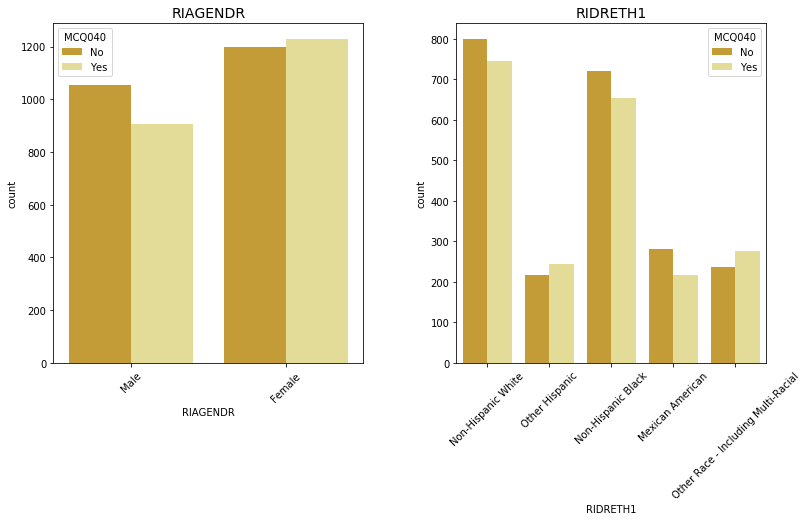

In [64]:
cat_var = ['RIAGENDR', 'RIDRETH1']
plt.figure(figsize=(20, 15))
for i, var in enumerate(cat_var):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xticks(rotation = 45)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= my_df, x = var, hue="MCQ040", palette = ['goldenrod','khaki'])
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/desc_stat_bef_1')

/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/rds/general/user/md2620/home/.local/lib/python3.6/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


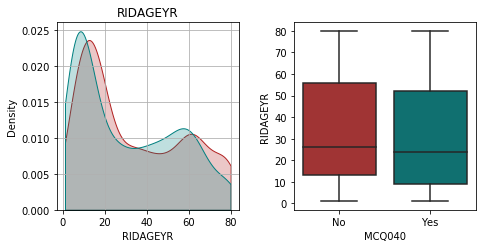

In [60]:
continous_var = ['RIDAGEYR']
plt.figure(figsize=(16, 25))
for i, col in enumerate(continous_var):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)
    
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(my_df.loc[my_df["MCQ040"]=='No', col], label="No Asthma attack last year", color = "firebrick", shade=True, kernel='gau', cut=0)
    sns.kdeplot(my_df.loc[my_df["MCQ040"]=='Yes', col], label="Asthma attack last year",  color = "teal", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2) 
    sns.boxplot(y = col, data = my_df, x="MCQ040", palette = ["firebrick", "teal"])
plt.savefig('/rds/general/user/md2620/home/ML_project/Plots/desc_stat_bef_2')